<a href="https://colab.research.google.com/github/dyjdlopez/rtu-py4ai/blob/main/rtu_py4ai_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Crash Course Machine Learning
Copyright D.Lopez 2021 | All Rights reserved <br><br>
The main difference between machine learning and traditional programming is the paradigm at which a solution is created.<br>
<b>Traditional Programming</b><br>
In traditional programming or the usual way, when we code a solution we start with a set of given inputs and some set of rules we code so that when we run our program with the set of inputs we get some desirable output.<br>
<b>Machine Learning</b><br>
In machine learning programming, we have a set of inputs and outputs and we try to find a way to determine a rule, pattern, or equation that will describe the relationship between the inputs and outputs.

![image](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2034058%2F27e3bdf0545d237a1672fc201481774d%2Fml.png?generation=1562172278272384&alt=media)<br>

Machine learning can be further classified into several cognitive paradigms:

<b>Supervised learning</b>— is a type of machine learning that requires input data to have a feature and a label or the typical X data and y label format. Supervised learning requires its dataset to be:
* Large (Volume)
* Various
* Valid

<b>Unsupervised learning</b>—unlike input data from supervised learning, unsupervised learning data doesn't have labels. Unsupervised learning aims to find patterns in unexplored data. Typical applications of unsupervised learning include: dimension reduction and clustering.

<b>Reinforcement learning</b>—the inputs for a reinforcement learning algorithm requires little to none data (in form of a dataset) to succeed in learning. Reinforcement learning aims to learn a rule, policy, or “way to do stuff” by determining whether its actions for a certain environment is rewarded or punished by its algorithm. The common uses of reinforcement learning included optimization.

In the succeeding topics, we will be focusing on supervised learning using Deep Neural Networks.

In this module, we will have a start with machine learning. We’ll learn about datasets and the learning algorithms that we can use to recognize patterns between datasets.



## Part 1: Datasets
Datasets consist of data that are relevant to a certain scenario or subject of interest. It may contain numerical, text, image data, or a mix of them. Datasets, depending on where they are obtained, need to be cleaned and transformed to fit your needs.

### 1.1 Pandas

Another tool to add to the machine learning engineer's toolbox is Pandas. [Pandas](https://pandas.pydata.org/docs/#module-pandas) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. <br>
Check out:
* [Setting up DataFrames in Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented)
* [Reading and writing Data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write)
* [Summarizing Stastics of a Dataset](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#min-tut-06-stats)

In [ ]:
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.2 List and Series

### 1.3 Dictionaries and DataFrames

### 1.4 Preset Datasets

In [ ]:
# We'll use a preset dataset available in Google Colab
ds = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
ds.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
X = ds['population'].values.reshape(-1,1)
y = ds['total_bedrooms'].values.reshape(-1,1)

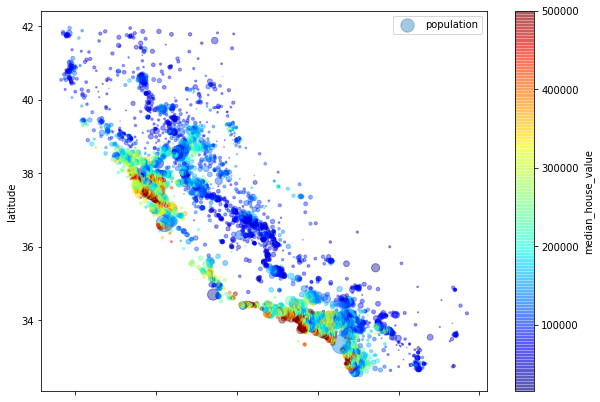

In [ ]:
ds.plot(kind="scatter", x = "longitude", y= 'latitude', alpha= .4, 
            s=ds["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )

## Part 2: Basic Sklearn
A fundamental concept in Pattern recognition is curve fitting. This allows our programs to do approximations and optimizations given a set of data. For this section, we will use [SciKit Learn](https://scikit-learn.org/stable/index.html). SciKit Learn is one of the most useful libraries for Data Science and Machine Learning Engineering in modeling learning algorithms. It has a range of APIs that will greatly assist in Data wrangling, data validation, supervised learning, and unsupervised learning. Check out these SciKit learn [tutorials](https://scikit-learn.org/stable/user_guide.html) for better understanding.

In [ ]:
#!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2.1 Linear Regression
Linear regression is one of the fundamental and easiest curve fitting techniques in Pattern Recognition. Long story short, linear regression finds the best-fit first order polynomial to a given dataset $X$. This line is represented as:
$$y = \omega X+b$$
A linear regression algorithm or a linear regressor $y$ learns the weights $\omega$ and bias $b$.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_summary = pd.DataFrame(['population'], columns=['Features'])
model_summary['Weights Raw'] = model.coef_
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,population,0.321163
1,Intercept,80.366185


From here we can interpret this as the regressor as:
$$y_{\text{total bedrooms}} = \omega_{\text{population}}X+b \\
y_{\text{total bedrooms}} = 0.321\cdot X + 80.366$$

In [ ]:
preds = model.predict(X_test)
out = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds.flatten()})
out

,Actual,Predicted
0,678.0,922.133136
1,347.0,415.338688
2,199.0,279.165782
3,269.0,283.983219
4,1052.0,1063.123480
...,...,...
3395,451.0,504.300704
3396,722.0,524.533943
3397,253.0,309.355058
3398,3298.0,2494.544807


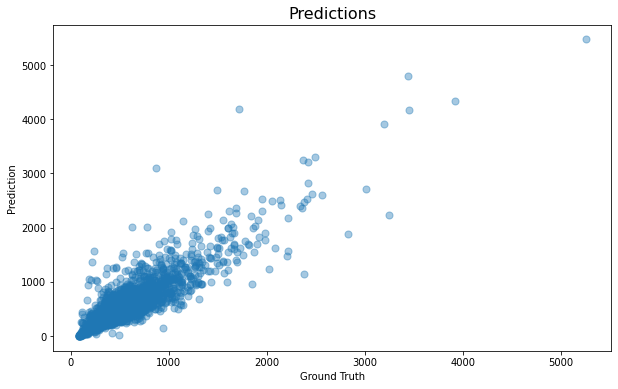

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Predictions', fontsize=16)

plt.scatter(preds, y_test, s = 50,  alpha=0.4)
plt.xlabel('Ground Truth', fontsize=10)
plt.ylabel('Prediction', fontsize=10)

plt.show()

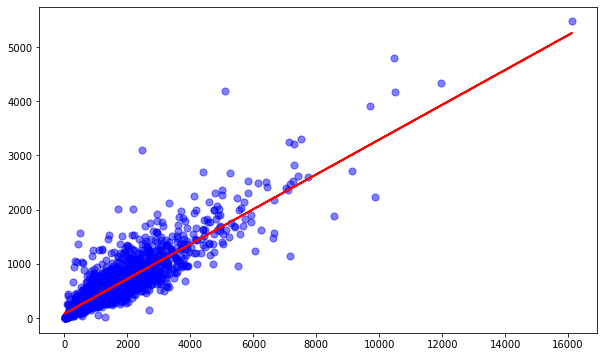

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test,  s = 50, color='blue', alpha=0.5)
plt.plot(X_test, preds, color='red', linewidth=2)
plt.show()

### 2.2 Fundamentals of TensorFlow
Copyright D.Lopez 2021 | All Rights reserved <br><br>

[TensorFlow](https://www.tensorflow.org/) is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.<br>
TensorFlow provides several APIs that allow developers to develop a range of AI Apps from data estimation, computer vision, natural language processing, and even reinforcement learning.
![image](https://camo.githubusercontent.com/c04e16c05de80dadbdc990884672fc941fdcbbfbb02b31dd48c248d010861426/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f736f6369616c2e706e67)<br>





In [ ]:
# !pip install tensorflow
# !pip install tensorflow-gpu
import tensorflow as tf

The Perceptron was first conceptualized by Frank Rosenblatt in his paper [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf) in 1958. The perceptron is one of the earliest mathematical conceptualization of a brain neuron. In simplest terms, a perceptron does a weighted sum of all inputs and then performs an activation. 
![image](https://jontysinai.github.io/assets/article_images/2017-11-11-the-perceptron/bio-vs-MCP.png)

In [ ]:
#Features
X = np.arange(-1,10, dtype=float)
def fx(x): return 2*x-1
#Targets/Labels
y = np.array(list(map(fx,X)))

In [ ]:
print(X)
print(y)

[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[-3. -1.  1.  3.  5.  7.  9. 11. 13. 15. 17.]


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

In [ ]:
### Dense Layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])
])
lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 246ms/step - loss: 128.6594
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 28.6488
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 6.7818
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 1.9946
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.9407
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7027
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6433
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6230
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6113
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6016


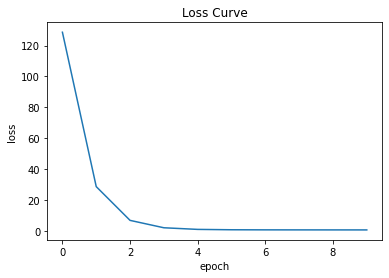

In [ ]:
plt.title('Loss Curve')
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
model.predict([10.0])

array([[18.292841]], dtype=float32)

In [ ]:
X_test = np.arange(10,20)
y_test = fx(X_test).reshape(-1,1)
h_test = model.predict(X_test)

In [ ]:
y_test

array([[19],
       [21],
       [23],
       [25],
       [27],
       [29],
       [31],
       [33],
       [35],
       [37]])

In [ ]:
h_test

array([[18.292841],
       [20.098047],
       [21.903252],
       [23.708458],
       [25.513664],
       [27.31887 ],
       [29.124077],
       [30.929283],
       [32.73449 ],
       [34.539696]], dtype=float32)

$$MSE = \frac{1}{M}\sum^M_{i=0}(h-y)^2$$

In [ ]:
def MSE(h,y):
  mse = np.mean(np.sum((h-y)**2))
  return mse
MSE(h_test, y_test)

28.212511848840222

## Part 3 Computer Vision
Using deep neural network to solve image processing problems leads to the developing computer vision solutions. The goal of computer vision is to mimic the visio-cognitive functions of the brain. The main activities being done in computer vision include image and video recognition systems. For almost a decade there are a lot of effort being made in improving image systems in which the following tasks were introduced:
![image](https://3.bp.blogspot.com/-e-V_TvNbMSc/XJ7uRvmc4CI/AAAAAAAADPo/47Cg4DqI-g45qQEDRYuPwgaEiqqYDq2wACLcBGAs/s1600/cnn-extensions.png)

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
plt.imshow(training_images[0])
training_images[0].shape

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation=relu), 
                                    tf.keras.layers.Dense(10, activation=softmax)
])

In [ ]:
model.compile(optimizer=Adam(),
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history3 = model.fit(training_images, training_labels, epochs=5)

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history3.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
model.evaluate(test_images, test_labels)